In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## Problems

Ex. 6.1  
Ex. 6.2  
Ex. 6.4  
Problem 6.1  
Problem 6.3  
Problem 6.6  
- Don't worry about creating a movie, as it's more important to focus on understanding the model. Instead of a movie, create a 3x3 figure similar in style to Fig. 6.7. Plot the results for trials 1, 10, and 20.   

Problem 12.6  
- Part (c): Again, no need to create a movie; plot trials 1, 15, and 30. Include a vertical line through posterior mean as well.   
- Part (d): Skip! If you followed instructions for part c, there is no new information gained from this part.   

Problem 13.8  
- Big hint for part (a): We assume there is no uncertainty regarding the world state (s) or the measurement (x). In other words, observers have no uncertainty with regard to visual perception of where the rewards and losses are.   


### Exercises 6.1
Why is this a properly normalized distribution?
- Because it is when integrated over all possible values of r, it sums to 1.


### Exercise 6.2   
Show this using Eq. (6.11) for the variance of a beta-distributed random variable.
- Eq 6.11
$$Var[y] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

We can start by subsituting our variables to replace the $\alpha$ and $\beta$ into the equation to get. $\alpha = n_{rain} + 1$ and $\beta = n_{dry} + 1$

$$Var[r|x] = \frac{(n_{rain}+1)(n_{dry}+1)}{((n_{rain}+1)+(n_{dry}+1))^2((n_{rain+1})+(n_{dry}+1)+1)}$$

We can then futher simplify as $(n_{rain} + 1) + (n_{dry} + 1) = t+2$, and $(n_{rain} + 1) + (n_{dry} + 1) + 1 = t+3$, and get the following:

$$Var[r|x] = \frac{(n_{rain}+1)(n_{dry}+1)}{(t+2)^2(t+3)}$$

Since the original equation is standard deviation, we can take the square root and arrive at:
$$std[r|x] =\sqrt{\frac{(n_{rain}+1)(n_{dry}+1)}{(t+2)^2(t+3^2)}}$$


FInally, we can factor out the $(t-2)^2$ term and arrive at our final equation:

$$std[r|x] =  \frac{1}{t+2}\sqrt{\frac{(n_{rain}+1)(n_{dry}+1)}{t+3}}$$

### Ex. 6.4

Show mathematically why this is the case.
Prior
$$p(r) \propto r^{a_0-1}(1-r)^{b_0-1}$$

Likelihood
$$p(r|x) \propto r^{n_{rain}}(1-r)^{n_{dry}}$$

Posterior
$$p(x|r) \propto p(r)P(r|x)$$

$$p(x|r) \propto r^{\alpha_0-1}r^{n_{rain}}(1-r)^{\beta_0-1}(1-r)^{n_{dry}}$$

which simplifies to

$$p(x|r) \propto r^{a_0+n_{rain}-1}(1-r)^{\beta_0+n_{dry}-1}$$


### Problem 6.1
Mean
$$\hat{r}_{PM} = \frac{n_{rain}+1}{t+2}$$
MAP
$$\hat{r}_{MAP} = \frac{n_{rain}}{t}$$


a. 
Answers
$$MAP = 0.25 = \frac{4}{1}$$

$$PME = 0.33 = \frac{1+1}{4+2}$$

b. Due to our prior being uniform, the probability of rain is 0.5. So our the posetrior beta distributions is skewed towards the prior, and therefore, it makes sense our mean estimate is closer to the prior compared to the MAP. This is because the mean estimate takes into account the distribtuin, not just the maximum value.

c. 

In [4]:
r_values = np.linspace(0, 1, 1000)  # 1000 values between 0 and 1

n_rain = 1
n_total = 4
likelihoods = r_values**n_rain * (1 - r_values)**(n_total - n_rain)

posterior = likelihoods / np.sum(likelihoods)

posterior_mean = np.sum(r_values * posterior)

print("The posterior mean estimate of r is:", posterior_mean)


The posterior mean estimate of r is: 0.3333338900020407


### Problem 6.3
a. 
$$r^{n_{rain}}(1-r)^{n_{dry}}$$
since $n_{dry} = 0$, we get:
$$r^{n_{rain}}$$

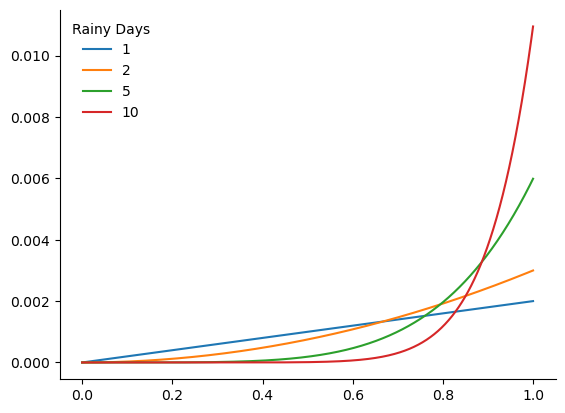

In [5]:
r_values = np.linspace(0, 1, 1000)  # 1000 values between 0 and 1
fig, ax = plt.subplots()
for n_rain in [1, 2, 5, 10]:
    likelihoods = r_values**n_rain 
    posterior = likelihoods / np.sum(likelihoods)
    ax.plot(r_values, posterior, label=f"{n_rain}")

ax.legend(frameon=False, title="Rainy Days")
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
    


c.
$$\hat{r}_{PM} = \frac{n_{rain}+1}{t+2}$$
$$0.9 = \frac{n_{rain}+1}{n_{rain}+2}$$
$$n_{rain} = 8$$
So after 8 days we would have this belief.



### 6.6

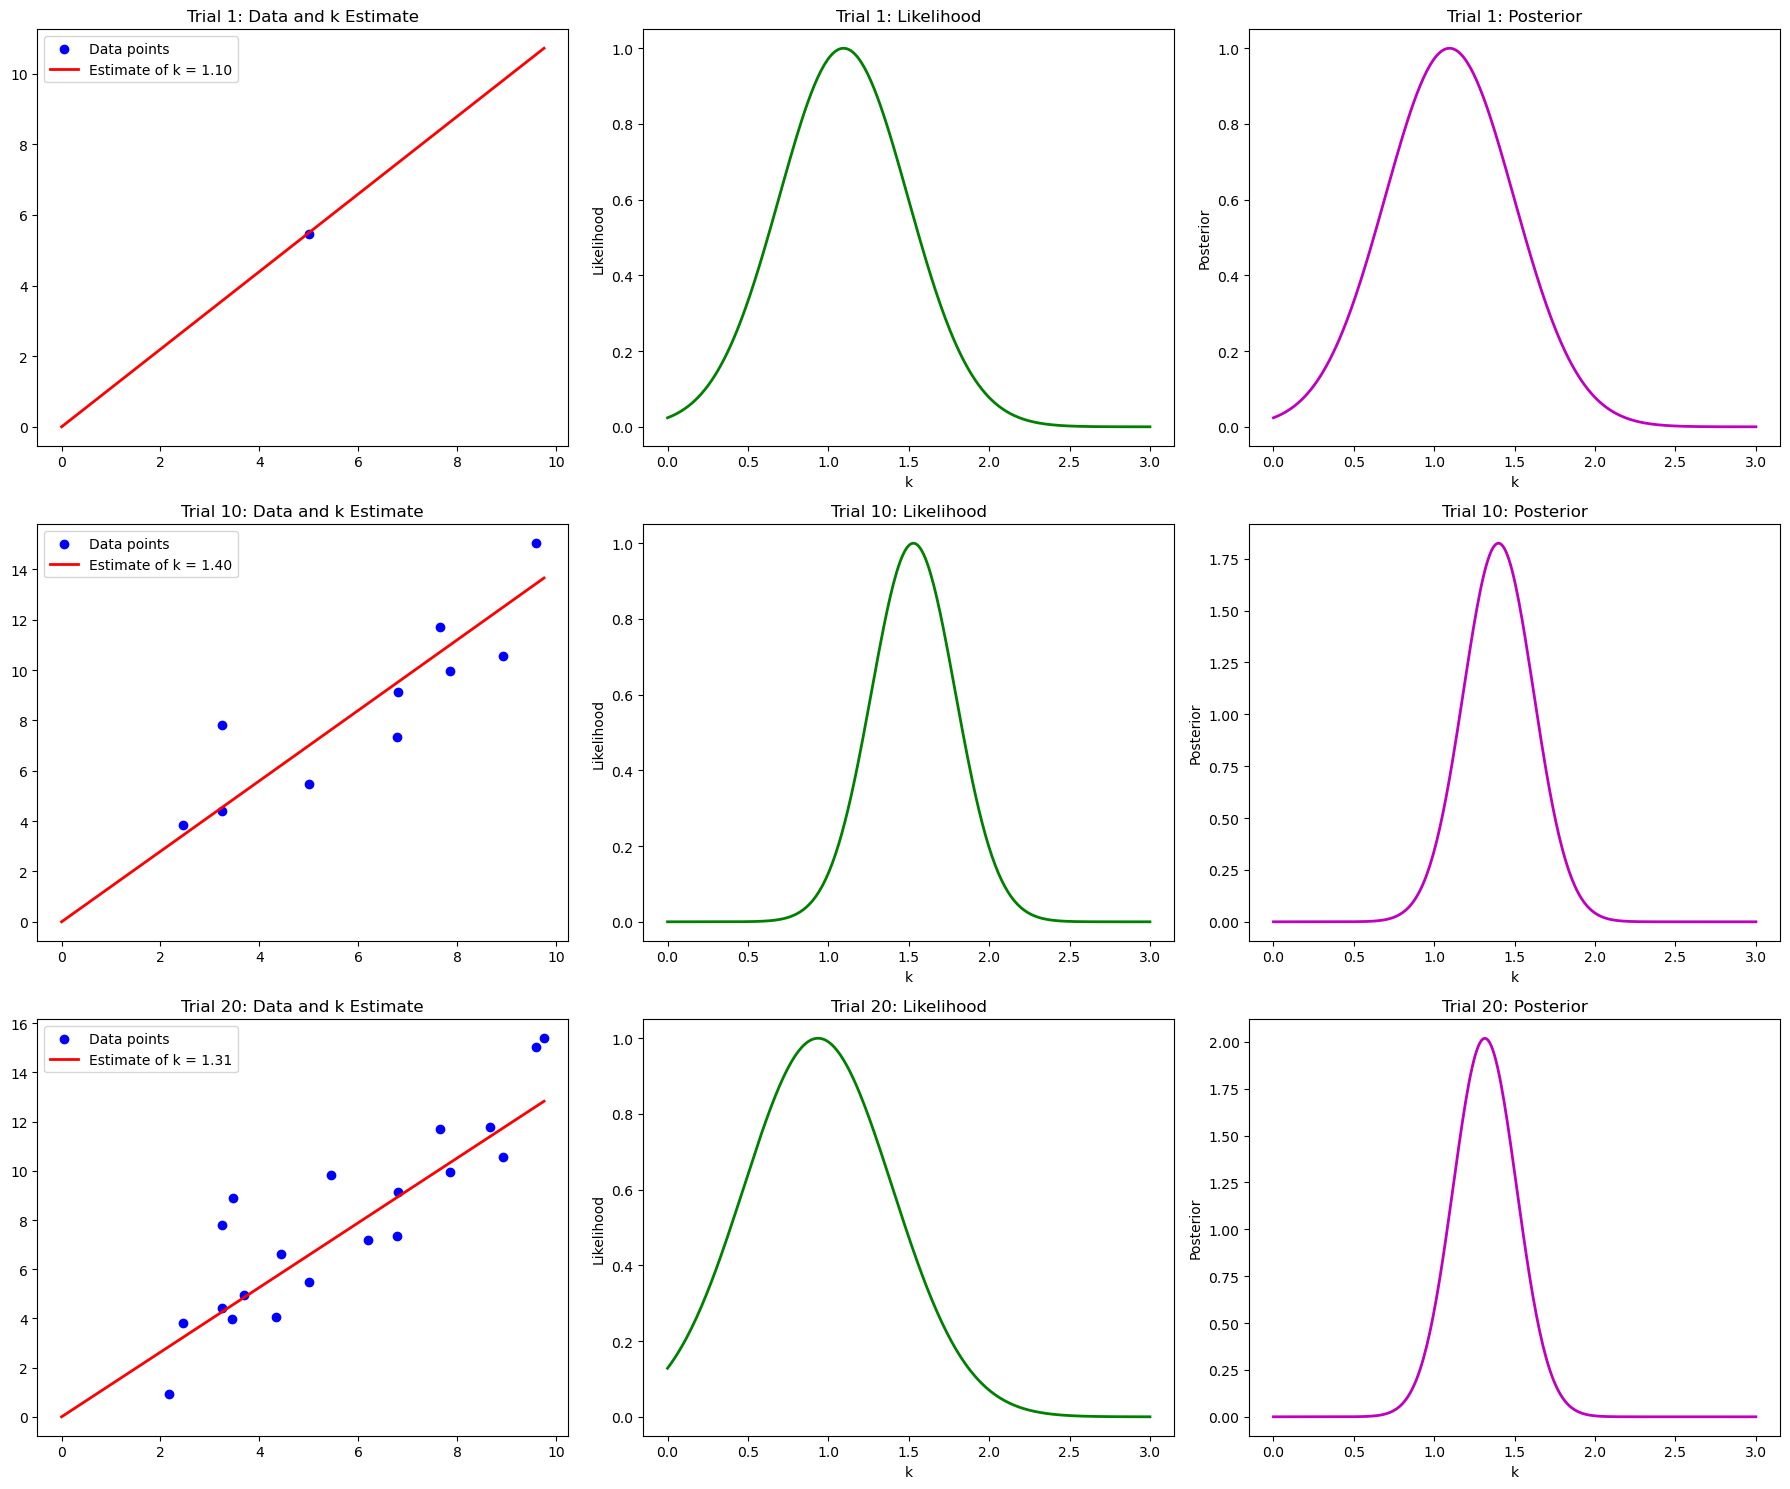

In [6]:
# Constants for the new run
n_trials = 20  # Number of trials
s_range = (2, 10)  # Range of s values
mean_multiplier = 1.5  # Multiplier for mean of force measurements
std_dev = 2  # Standard deviation for force measurements
k_min, k_max = 0, 3  # Range for plotting k values
k_values = np.linspace(k_min, k_max, 300)  # Discrete k values for calculations

# Generating data
np.random.seed(42)  # For reproducibility
s_values = np.random.uniform(s_range[0], s_range[1], n_trials)
force_measurements = mean_multiplier * s_values + np.random.normal(0, std_dev, n_trials)

# Prior is flat for k
prior = np.ones_like(k_values)

# Function to calculate likelihood of observing F given s and k
def likelihood(F, s, k):
    return np.exp(-(F - k * s)**2 / (2 * std_dev**2))

# Select trials for detailed plots: 1st, 10th, and 20th
selected_trials = [0, 9, 19]

# Initialize figure for 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
posterior = prior.copy()

for i, trial in enumerate(selected_trials):
    # Data for this trial
    s = s_values[trial]
    F = force_measurements[trial]

    # Calculate likelihood for this trial's measurement
    current_likelihood = likelihood(F, s, k_values)

    # Update posterior with the current likelihood
    if trial == 0:
        posterior = current_likelihood
    else:
        posterior *= current_likelihood
    posterior /= np.trapz(posterior, k_values)  # Normalize

    # Calculate mean of the current posterior as point estimate for k
    k_estimate = np.trapz(posterior * k_values, k_values) / np.trapz(posterior, k_values)

    # Plotting
    # Data and estimate of k
    axes[i, 0].scatter(s_values[:trial+1], force_measurements[:trial+1], color='blue', label='Data points')
    axes[i, 0].plot([0, max(s_values)], [0, k_estimate * max(s_values)], 'r-', lw=2, label=f'Estimate of k = {k_estimate:.2f}')
    axes[i, 0].set_title(f'Trial {trial+1}: Data and k Estimate')
    axes[i, 0].legend()

    # Likelihood for this trial
    axes[i, 1].plot(k_values, current_likelihood, 'g-', lw=2)
    axes[i, 1].set_title(f'Trial {trial+1}: Likelihood')
    axes[i, 1].set_xlabel('k')
    axes[i, 1].set_ylabel('Likelihood')

    # Cumulative posterior up to this trial
    axes[i, 2].plot(k_values, posterior, 'm-', lw=2)
    axes[i, 2].set_title(f'Trial {trial+1}: Posterior')
    axes[i, 2].set_xlabel('k')
    axes[i, 2].set_ylabel('Posterior')

# Adjust layout
plt.tight_layout()
plt.show()


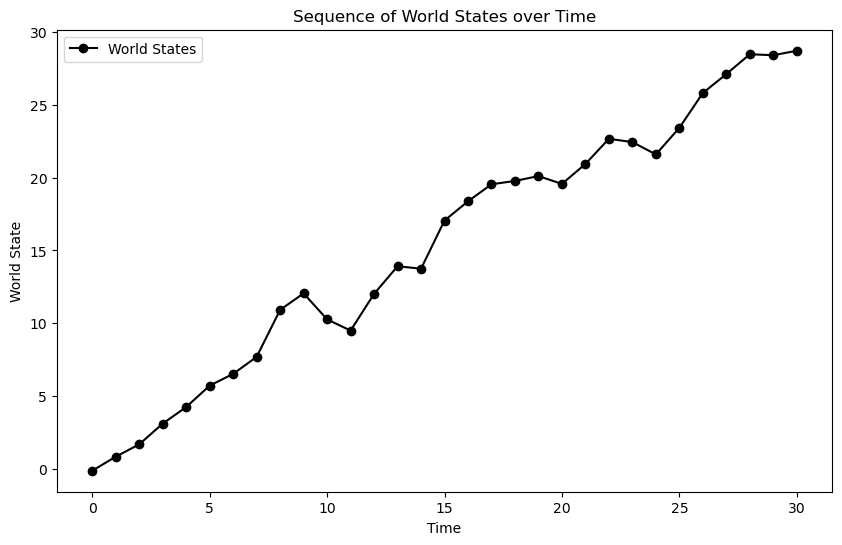

In [7]:
# Parameters for part (a) only
mu0 = 0
sigma0 = 1
sigma_s = 1
delta = 1
T = 30


# Generate world states s_t for part (a)
np.random.seed(1994) 

s = np.zeros(T+1)
s[0] = np.random.normal(mu0, sigma0)
for t in range(1, T+1):
    s[t] = s[t-1] + np.random.normal(delta, sigma_s)

time_steps = np.arange(0, T+1)

plt.figure(figsize=(10, 6))
plt.plot(time_steps, s, color='k', marker='o', label='World States')
plt.xlabel('Time')
plt.ylabel('World State')
plt.title('Sequence of World States over Time')
plt.legend()
plt.show()


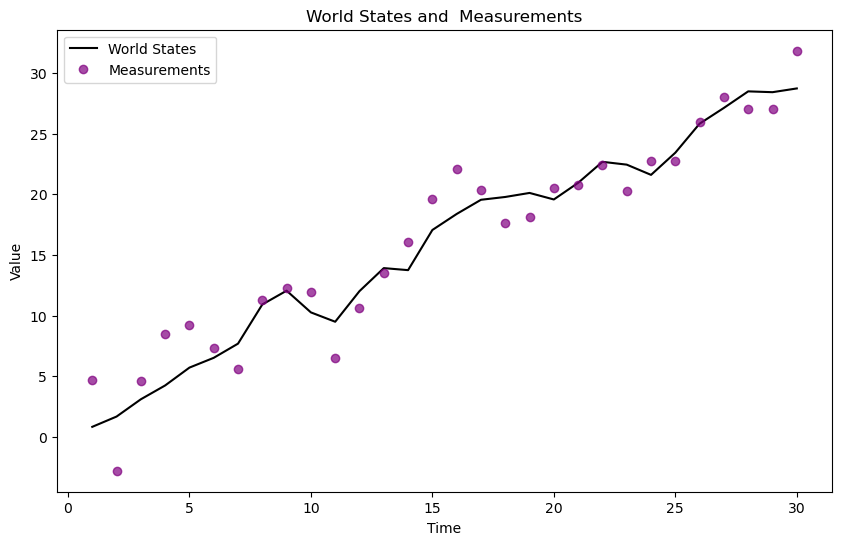

In [8]:
sigma_x = 2  # Standard deviation for measurement noise

x = np.array([np.random.normal(state, sigma_x) for state in s[1:]])

# Plotting world states and corresponding measurements
plt.figure(figsize=(10, 6))
plt.plot(time_steps[1:], s[1:], color='black', label='World States')
plt.plot(time_steps[1:], x, marker='o', color='purple', linestyle='none', label='Measurements', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('World States and  Measurements')
plt.legend()
plt.show()


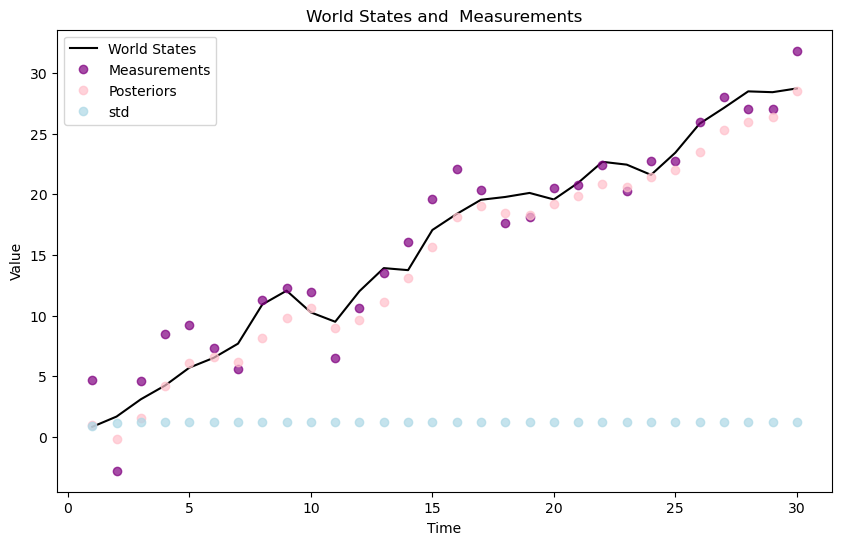

In [9]:
def calculate_posterior(prior_mean, prior_sig, meas_mean, meas_sig):
    # Calculate the posterior mean
    j1 = 1/prior_sig
    j2 = 1/meas_sig
    posterior_mean = (j2 * meas_mean + j1 * prior_mean) / (j2 + j1)
    posterior_sig = 1/(j1+j2)
    
    return posterior_mean, posterior_sig**0.5




posterior_means = np.zeros(T)
posterior_std = np.zeros(T)
p_mean, p_sigma = calculate_posterior(mu0, sigma0**2, x[0], sigma_x**2)
posterior_means[0] = p_mean
posterior_std[0] = p_sigma

for i in range(1, T):
    p_mean, p_sigma = calculate_posterior(p_mean, p_sigma**2+sigma0**2, x[i], sigma_x**2)
    posterior_means[i] = p_mean
    posterior_std[i] = p_sigma

# Plotting world states and corresponding measurements
plt.figure(figsize=(10, 6))
plt.plot(time_steps[1:], s[1:], color='black', label='World States')
plt.plot(time_steps[1:], x, marker='o', color='purple', linestyle='none', label='Measurements', alpha=0.7)
plt.plot(time_steps[1:], posterior_means, marker='o', color='pink', linestyle='none', label='Posteriors', alpha=0.7)
plt.plot(time_steps[1:], posterior_std, marker='o', color='lightblue', linestyle='none', label='std', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('World States and  Measurements')
plt.legend()
plt.show()

### Problem 13.8    
- Big hint for part (a): We assume there is no uncertainty regarding the world state (s) or the measurement (x). In other words, observers have no uncertainty with regard to visual perception of where the rewards and losses are.  

a.
$$EU(a) = 2.5\times p(green) + (-12.5)\times p(red)$$

In [10]:
# Helper function
def calc_gauss(x, mu, sigma, bin_width=1):
    p = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    p = p * bin_width  # To convert density to actual probability values
    return p

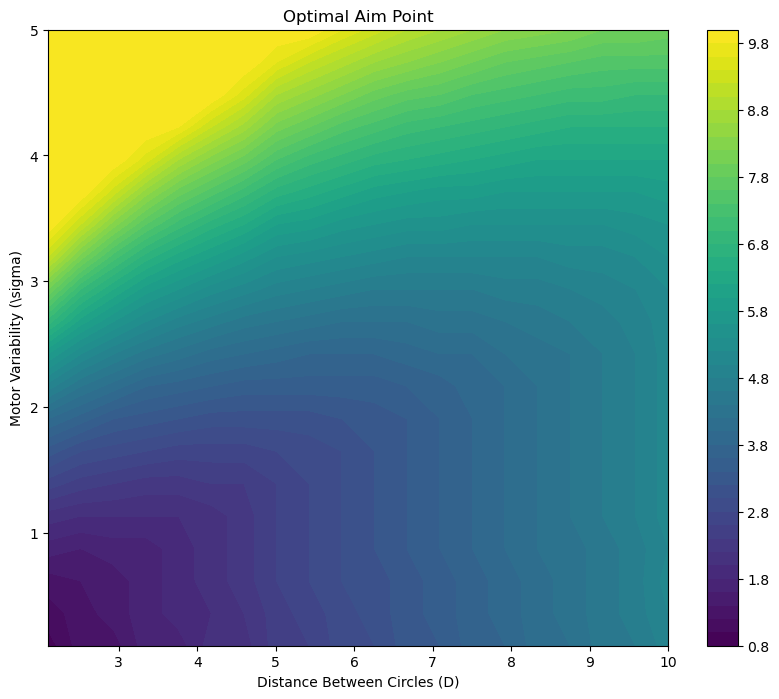

In [26]:
D_range = np.linspace(2.1, 10, 20)  # Example range for D
motor_sd_range = np.linspace(0.1, 5, 20)  # Example range for sigma

optimal_aim_points = np.zeros((len(D_range), len(motor_sd_range)))


for i, D in enumerate(D_range):
    for j, motor_sd in enumerate(motor_sd_range):
        # Problem we are trying to solve is finding optimal aimpoint that maximizes expected gain.
        # Must take into account reward and penalty regions as well as motor variability.
        # Below is starter code for plotting 1 combination of D and motor variability. 
        actions = np.arange(-10, 10.001, 0.1) # all possible aiming locations (i.e., actions)
        outcomes = np.arange(-10, 10.001, 0.1) # all possible outcomes (identical space as actions)
        radius = 1  # Radius of targets

        # Create gain landscape (i.e., the positions of targets and the rewards/losses
        # associated with them)
        rewards = np.zeros_like(outcomes)
        punishments = np.zeros_like(outcomes)
        rwd_lb, rwd_ub = D/2 - radius, D/2 + radius  # Upper and lower bounds of reward region
        pun_lb, pun_ub = -D/2 - radius, -D/2 + radius  # Upper and lower bounds of loss region
        rewards[np.argwhere((outcomes >= rwd_lb) & (outcomes <= rwd_ub))] = 2.5
        punishments[np.argwhere((outcomes >= pun_lb) & (outcomes <= pun_ub))] = -12.5
        gain = rewards + punishments

        expected_gain = np.zeros_like(outcomes)
        # Compute the expected gain for every possible action (aim point)
        for a in range(len(actions)):
            expected_gain[a] = np.sum(calc_gauss(outcomes, actions[a], motor_sd) * gain)

        a_opt_idx = np.argmax(expected_gain)  # Index for optimal aim point
        a_opt = actions[a_opt_idx]  # Optimal aim point

        optimal_aim_points[i, j] = a_opt

D_grid, sigma_grid = np.meshgrid(D_range, motor_sd_range)
plt.figure(figsize=(10, 8))
cp = plt.contourf(D_grid, sigma_grid, optimal_aim_points.T, levels=50, cmap='viridis')  # Transpose to match dimensions
plt.colorbar(cp)
plt.title('Optimal Aim Point')
plt.xlabel('Distance Between Circles (D)')
plt.ylabel('Motor Variability (\sigma)')
plt.show()